# TP1 : Logique floue 

## EXERCICE 1 

In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl

In [2]:
x_distance = np.arange(0, 31, 1)

### les fonction d'appartenance

In [3]:
v_small = fuzz.trapmf(x_distance, [0, 0, 2, 5])
small = fuzz.trimf(x_distance, [3, 7, 11])
perfect = fuzz.trimf(x_distance, [9, 15, 21])
big = fuzz.trimf(x_distance, [18, 22, 26])
v_big = fuzz.trapmf(x_distance, [24, 27, 30, 30])

### Tracer les fonctions d’appartenance 

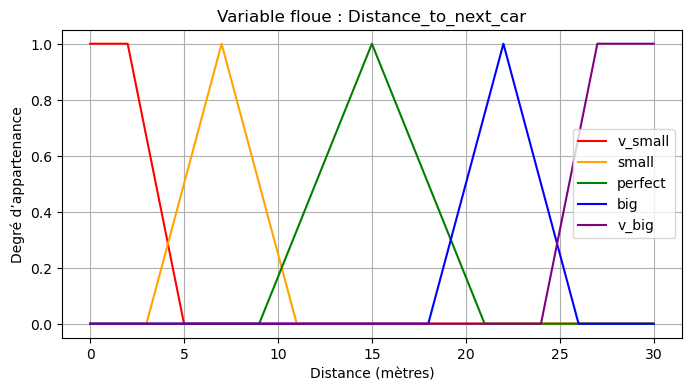

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(x_distance, v_small, 'r', linewidth=1.5, label='v_small')
plt.plot(x_distance, small, 'orange', linewidth=1.5, label='small')
plt.plot(x_distance, perfect, 'g', linewidth=1.5, label='perfect')
plt.plot(x_distance, big, 'b', linewidth=1.5, label='big')
plt.plot(x_distance, v_big, 'purple', linewidth=1.5, label='v_big')

plt.title('Variable floue : Distance_to_next_car')
plt.xlabel('Distance (mètres)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()

## EXERCICE 2 

In [7]:
x_speed = np.arange(-20, 21, 1)

### Fonctions d'appartenance

In [8]:
declining = fuzz.trimf(x_speed, [-20, -10, 0])       
constant  = fuzz.trapmf(x_speed, [-5, -2, 2, 5])     
growing   = fuzz.trimf(x_speed, [0, 10, 20])         

### Tracer les fonctions d’appartenance de la variable Speed_change   

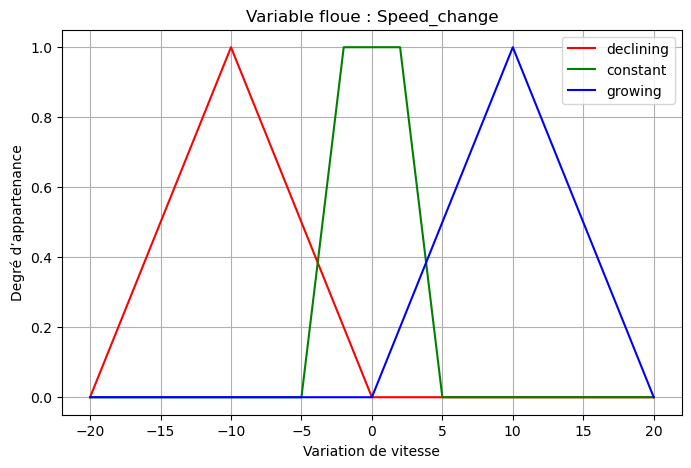

In [9]:
plt.figure(figsize=(8,5))
plt.plot(x_speed, declining, 'r', linewidth=1.5, label='declining')
plt.plot(x_speed, constant, 'g', linewidth=1.5, label='constant')
plt.plot(x_speed, growing, 'b', linewidth=1.5, label='growing')

plt.title('Variable floue : Speed_change')
plt.xlabel('Variation de vitesse')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()

## EXERCICE 3 

In [10]:
x_acc = np.arange(-3, 3.01, 0.01)

### Fonctions d'appartenance

In [11]:
neg_big   = fuzz.trapmf(x_acc, [-3, -3, -2.5, -1.5])
neg_small = fuzz.trimf(x_acc, [-2, -1, 0])
zero      = fuzz.trimf(x_acc, [-0.5, 0, 0.5])
pos_small = fuzz.trimf(x_acc, [0, 1, 2])
pos_big   = fuzz.trapmf(x_acc, [1.5, 2.5, 3, 3])

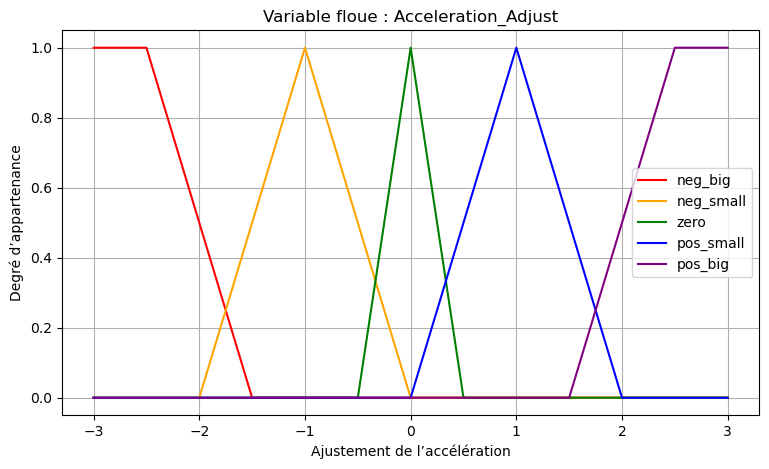

In [13]:
plt.figure(figsize=(9,5))
plt.plot(x_acc, neg_big, 'r', linewidth=1.5, label='neg_big')
plt.plot(x_acc, neg_small, 'orange', linewidth=1.5, label='neg_small')
plt.plot(x_acc, zero, 'g', linewidth=1.5, label='zero')
plt.plot(x_acc, pos_small, 'b', linewidth=1.5, label='pos_small')
plt.plot(x_acc, pos_big, 'purple', linewidth=1.5, label='pos_big')
plt.title('Variable floue : Acceleration_Adjust')
plt.xlabel('Ajustement de l’accélération')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()


## EXERCICE 3

In [14]:
# Univers de discours
x_distance = np.arange(0, 30.1, 0.1)
x_speed    = np.arange(-20, 20.1, 0.1)
x_acc      = np.arange(-3, 3.01, 0.1)

### Variable floue d'entrée : Distance_to_next_car

In [17]:
Distance_to_next_car = ctrl.Antecedent(x_distance, 'Distance_to_next_car')
Distance_to_next_car['v_small'] = fuzz.trapmf(x_distance, [0, 0, 2, 5])
Distance_to_next_car['small']   = fuzz.trimf(x_distance, [3, 7, 11])
Distance_to_next_car['perfect'] = fuzz.trimf(x_distance, [9, 15, 21])
Distance_to_next_car['big']     = fuzz.trimf(x_distance, [18, 22, 26])
Distance_to_next_car['v_big']   = fuzz.trapmf(x_distance, [24, 27, 30, 30])

### Variable floue d'entrée : Speed_change

In [19]:
Speed_change = ctrl.Antecedent(x_speed, 'Speed_change')
Speed_change['declining'] = fuzz.trimf(x_speed, [-20, -10, 0])
Speed_change['constant']  = fuzz.trapmf(x_speed, [-5, -2, 2, 5])
Speed_change['growing']   = fuzz.trimf(x_speed, [0, 10, 20])

### Variable floue de sortie : Acceleration_Adjust

In [20]:
Acceleration_Adjust = ctrl.Consequent(x_acc, 'Acceleration_Adjust')
Acceleration_Adjust['neg_big']   = fuzz.trapmf(x_acc, [-3, -3, -2.5, -1.5])
Acceleration_Adjust['neg_small'] = fuzz.trimf(x_acc, [-2, -1, 0])
Acceleration_Adjust['zero']      = fuzz.trimf(x_acc, [-0.5, 0, 0.5])
Acceleration_Adjust['pos_small'] = fuzz.trimf(x_acc, [0, 1, 2])
Acceleration_Adjust['pos_big']   = fuzz.trapmf(x_acc, [1.5, 2.5, 3, 3])

### règles floues

In [21]:
rules = [
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'],  Acceleration_Adjust['neg_big']),
    ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'],   Acceleration_Adjust['neg_big']),
    
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['declining'],   Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['constant'],    Acceleration_Adjust['neg_small']),
    ctrl.Rule(Distance_to_next_car['small'] & Speed_change['growing'],     Acceleration_Adjust['neg_big']),
    
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'],  Acceleration_Adjust['zero']),
    ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'],   Acceleration_Adjust['neg_small']),
    
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['declining'],     Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['constant'],      Acceleration_Adjust['pos_small']),
    ctrl.Rule(Distance_to_next_car['big'] & Speed_change['growing'],       Acceleration_Adjust['zero']),
    
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['declining'],   Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['constant'],    Acceleration_Adjust['pos_big']),
    ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['growing'],     Acceleration_Adjust['pos_small'])
]


### Création du système

In [22]:
acc_ctrl = ctrl.ControlSystem(rules)
acc_sim  = ctrl.ControlSystemSimulation(acc_ctrl)

### Simulation pour les valeurs d’entrée : Distance_to_next_car = 13 ; Speed_change = -2.5

Valeur de sortie Acceleration_Adjust : 0.517


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


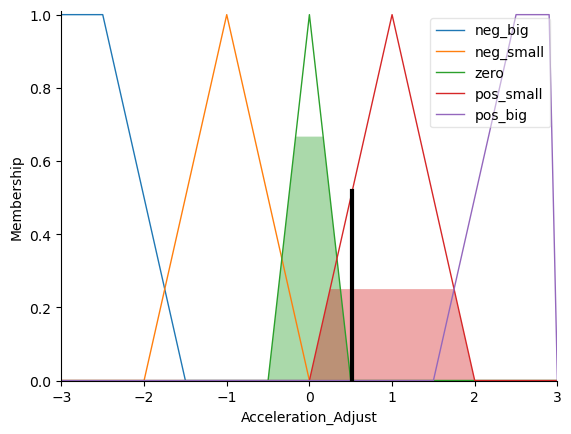

In [23]:
acc_sim.input['Distance_to_next_car'] = 13
acc_sim.input['Speed_change'] = -2.5

# Calcul de la sortie
acc_sim.compute()

# Affichage du résultat numérique
print("Valeur de sortie Acceleration_Adjust : {:.3f}".format(acc_sim.output['Acceleration_Adjust']))

# Visualisation
Acceleration_Adjust.view(sim=acc_sim)


# TP 2 

In [24]:
import numpy as np
import pandas as pd

# Fixer la graine pour reproductibilité
np.random.seed(42)

# Génération des entrées aléatoires
n_samples = 1000
distance_samples = np.random.uniform(0, 30, n_samples)
speed_change_samples = np.random.uniform(-20, 20, n_samples)

# Initialiser les listes pour stocker les sorties
acc_adjust_samples = []

# Simulation avec le système flou (TP1/TP2)
for d, s in zip(distance_samples, speed_change_samples):
    acc_sim.input['Distance_to_next_car'] = d
    acc_sim.input['Speed_change'] = s
    acc_sim.compute()
    acc_adjust_samples.append(acc_sim.output['Acceleration_Adjust'])

# Création du DataFrame
data = pd.DataFrame({
    'Distance_to_next_car': distance_samples,
    'Speed_change': speed_change_samples,
    'Acceleration_Adjust': acc_adjust_samples
})

print(data.head())


   Distance_to_next_car  Speed_change  Acceleration_Adjust
0             11.236204    -12.594683         1.000000e+00
1             28.521429      1.676038         2.096827e+00
2             21.959818     14.917833         5.262637e-17
3             17.959755      9.288995        -1.000000e+00
4              4.680559     12.262446        -2.349333e+00


### Entraînement d’un modèle de régression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Séparation train/test
X = data[['Distance_to_next_car', 'Speed_change']]
y = data['Acceleration_Adjust']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Évaluation des performances

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Erreur absolue moyenne (MAE) : {mae:.3f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.3f}")


Erreur absolue moyenne (MAE) : 0.027
Erreur quadratique moyenne (MSE) : 0.003


### 4. Avantages de la logique floue

La logique floue est explicable car ses règles sont faciles à comprendre et montrent clairement comment les entrées influencent la sortie.

### 5. Avantages du machine learning

Le machine learning offre une meilleure précision, car il apprend automatiquement les relations complexes entre les variables à partir des données.

# Fin